<a href="https://colab.research.google.com/github/Viny2030/NLP/blob/main/10_Ejercicio2_Clasificacion_Textos_Scikit_TFIDF_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10 - Ejercicio 2: Clasificación de textos con Scikit-Learn


* Este ejercicio es exactamente igual que el notebook "*09_Scikit_Clasificacion_Textos*" que consistia en clasificar una serie de Tweets en Ingles sobre críticas a los productos de Apple.


* Estos tweets estan clasificados como: *positivos*, *neutros* o *negativos*


* En esta caso vamos a realizar un cambio para ver si los resultados de clasificación mejoran o no respecto al notebook "*09_Scikit_Clasificacion_Textos*" y este cambio va a consistir en ***cambiar la bolsa de palabras de frecuencias a TF-IDF***


* ***El objetivo es ver si con este cambio los resultados obtenidos por los modelos generados son mejores, peores o iguales que los obtenidos anteriormente***


* Al igual que en el notebook "*09_Scikit_Clasificacion_Textos*" realizaremos los siguientes pasos:
    
    1. Carga de los datos (tweets)
    2. Normalización (en ingles) de los tweets
    3. ***Creacción de la Bolsa de Palabras*** - TODO -
    4. Particionado de Datos
    5. Creacción de modelos
        - Multinomial Naive Bayes
        - Bernoulli Naive Bayes
        - Regresion Logistica
        - Support Vector Machine
        - Random Forest
    6. Evaluación de los modelos

<hr>


## Carga de Datos


In [1]:
import pandas as pd
tweets_file = 'https://raw.githubusercontent.com/Viny2030/datasets/refs/heads/main/Apple_Tweets.csv'
df = pd.read_csv(tweets_file, header=None)
tweets = [tuple(x) for x in df.values]
print('Número de Tweets Cargados: {num}'.format(num=len(tweets)))

Número de Tweets Cargados: 3804


<hr>


## Normalización

* Para ***normalizar*** los tweets realizaremos las siguientes acciones:
    1. Pasamos las frases a minúsculas.
    2. Eliminamos los signos de puntuación.
    3. Eliminamos las palabras con menos de 3 caracteres.
    4. Eliminamos las Stop-Words.
    5. Eliminamos las palabras que empiecen por '@' o 'http'.
    6. Pasamos la palabra a su lema


In [4]:
!pip install spacy
!python -m spacy download es_core_news_sm
import spacy

from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 20.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
nlp = spacy.load('es_core_news_sm')

# Divido los datos en dos listas
#     X: los tweets
#     y: target (polaridad)

X = [doc[0] for doc in tweets]
y = [doc[1] for doc in tweets]

def normalize(sentenses):
    """normalizamos la lista de frases y devolvemos la misma lista de frases normalizada"""
    for index, sentense in enumerate(tqdm(sentenses)):
        sentense = nlp(sentense.lower()) # Paso la frase a minúsculas y a un objeto de la clase Doc de Spacy
        sentenses[index] = " ".join([word.lemma_ for word in sentense if (not word.is_punct)
                                     and (len(word.text) > 2) and (not word.is_stop)
                                     and (not word.text.startswith('@')) and (not word.text.startswith('http'))])
    return sentenses

# Normalizamos las frases
X = normalize(X)

100%|██████████| 3804/3804 [00:47<00:00, 80.91it/s] 


<hr>


## Bolsa de Palabras - EJERCICIO -


* En este punto hay que construir la bolsa de palabras con el TF-IDF (Ver notebook: "*05_Bag_of_Words_BoW*")


* Al igual que la implementación de la clase "*CountVectorizer*", la clase "*TfidfVectorizer*" también permite quedarnos con las palabras más relevantes, utilizando los dos parámetros que son:
    - **max_features**: Con este parámetro le indicamos que nos seleccione la '*X*' palabras más frecuentes del corpus. En este ejemplo **seleccionaremos las 1000 más frecuentes**.
    - **min_df**: Con este parámetro le indicamos el número mínimo de documentos en la que tiene que aparecer la palabra para que se incluya en la bolsa de palabras. En este ejemplo **seleccionaremos 3 documentos** (tweets).
    

* ***NOTA***: para más información podéis mirar la documentación de la clase "*TfidfVectorizer*" en: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
    

In [ ]:
# TODO

<hr>


## Particionado de Datos (Train y Test)

* Particionamos de la siguiente manera:

    - 80% de datos de entrenamiento
    - 20% de datos de test

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Use len(X_train) to get the number of elements in the list instead of X_train.shape[0]
print('Número de Tweets para el entrenamiento: {num}'.format(num=len(X_train)))
# Use len(X_test) to get the number of elements in the list instead of X_test.shape[0]
print('Número de Tweets para el test: {num}'.format(num=len(X_test)))

Número de Tweets para el entrenamiento: 3043
Número de Tweets para el test: 761


<hr>


## Creacción de los Modelos


* Para este ejercicio vamos a usar los siguientes algoritmos de aprendizaje:

    - Multinomial Naive Bayes
    - Bernoulli Naive Bayes
    - Regresion Logistica
    - Support Vector Machine
    - Random Forest (ensemble)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=1000, min_df=3)

# Fit the vectorizer to the training data and transform it
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_vec = vectorizer.transform(X_test)

# Now use X_train_vec and X_test_vec for training and tes

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=1000, min_df=3)

# Fit the vectorizer to the training data and transform it
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_vec = vectorizer.transform(X_test)

# Now use X_train_vec and X_test_vec for training and testing
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
svm_lin = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')
svm_sig = SVC(kernel='sigmoid')
rf_20 = RandomForestClassifier(n_estimators=500, bootstrap=True, criterion='gini', max_depth=20, random_state=0)
rf_50 = RandomForestClassifier(n_estimators=500, bootstrap=True, criterion='gini', max_depth=50, random_state=0)

clasificadores = {'Multinomial NB': mnb,
                  'Bernoulli NB': bnb,
                  'Regresion Logistica': lr,
                  'SVM lineal': svm_lin,
                  'SVM polinomico': svm_poly,
                  'SVM Kernel rbf': svm_rbf,
                  'SVM Kernel Sigmoid': svm_sig,
                  'Random Forest d_20': rf_20,
                  'Random Forest d_50': rf_50}


# Ajustamos los modelos y calculamos el accuracy para los datos de entrenamiento
for k, v in clasificadores.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    # Use the vectorized training data (X_train_vec) for fitting the models
    v.fit(X_train_vec, y_train)

CREANDO MODELO: Multinomial NB
CREANDO MODELO: Bernoulli NB
CREANDO MODELO: Regresion Logistica
CREANDO MODELO: SVM lineal


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


CREANDO MODELO: SVM polinomico
CREANDO MODELO: SVM Kernel rbf
CREANDO MODELO: SVM Kernel Sigmoid
CREANDO MODELO: Random Forest d_20
CREANDO MODELO: Random Forest d_50


<hr>


## Evaluación del Modelo


* Para cada uno de los modelos vamos a calcular las siguientes métricas de evaluación:

    1. **Accuracy**
    2. **Precision**
    3. **Recall**
    4. **F1**

In [14]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

def evaluation(model, name, X_train_vec, y_train, X_test_vec, y_test):
    """
    Función de devuelve en un diccionario las métricas de evaluación de
    Accuracy, Precision, Recall y F1 para los conjuntos de datos de entrenamiento y test
        model: modelo a evaluar
        name: nombre del modelo
        X_train_vec: Variables de entrada del conjunto de datos de entrenamiento vectorizadas
        y_train: Variable de salida del conjunto de datos de entrenamiento
        X_test_vec: Variables de entrada del conjunto de datos de test vectorizadas
        y_test: Variable de salida del conjunto de datos de test
        return: diccionario con el nombre del modelo y el valor de las métricas
    """
    model_dict = {}
    model_dict['name'] = name
    # Predict using the vectorized data
    y_pred_train = model.predict(X_train_vec)
    y_pred_test = model.predict(X_test_vec)
    model_dict['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test, average='weighted')

    return model_dict


# Calculamos las métricas de los modelos por separado
evaluacion = list()
for key, model in clasificadores.items():
    evaluacion.append(evaluation(model=model, name=key,
                                 # Pass the vectorized data to the evaluation function
                                 X_train_vec=X_train_vec, y_train=y_train,
                                 X_test_vec=X_test_vec, y_test=y_test))

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests
name,,,,,,,,
Multinomial NB,0.779494,0.746386,0.792051,0.752716,0.779494,0.746386,0.764288,0.726265
Bernoulli NB,0.748932,0.709593,0.753914,0.713250,0.748932,0.709593,0.749321,0.709776
Regresion Logistica,0.817943,0.749014,0.828181,0.750717,0.817943,0.749014,0.804792,0.731502
SVM lineal,0.827144,0.743758,0.840289,0.743466,0.827144,0.743758,0.814715,0.727715
SVM polinomico,0.946106,0.712221,0.948606,0.716170,0.946106,0.712221,0.945665,0.684356
SVM Kernel rbf,0.897141,0.750329,0.905890,0.748829,0.897141,0.750329,0.892484,0.732016
SVM Kernel Sigmoid,0.770621,0.745072,0.778249,0.745202,0.770621,0.745072,0.751385,0.727158
Random Forest d_20,0.776865,0.722733,0.831847,0.751368,0.776865,0.722733,0.746159,0.688221
Random Forest d_50,0.887940,0.734560,0.904134,0.730780,0.887940,0.734560,0.883556,0.714508


* Representamos las métricas para los diferentes modelos en un gráfico de barras:

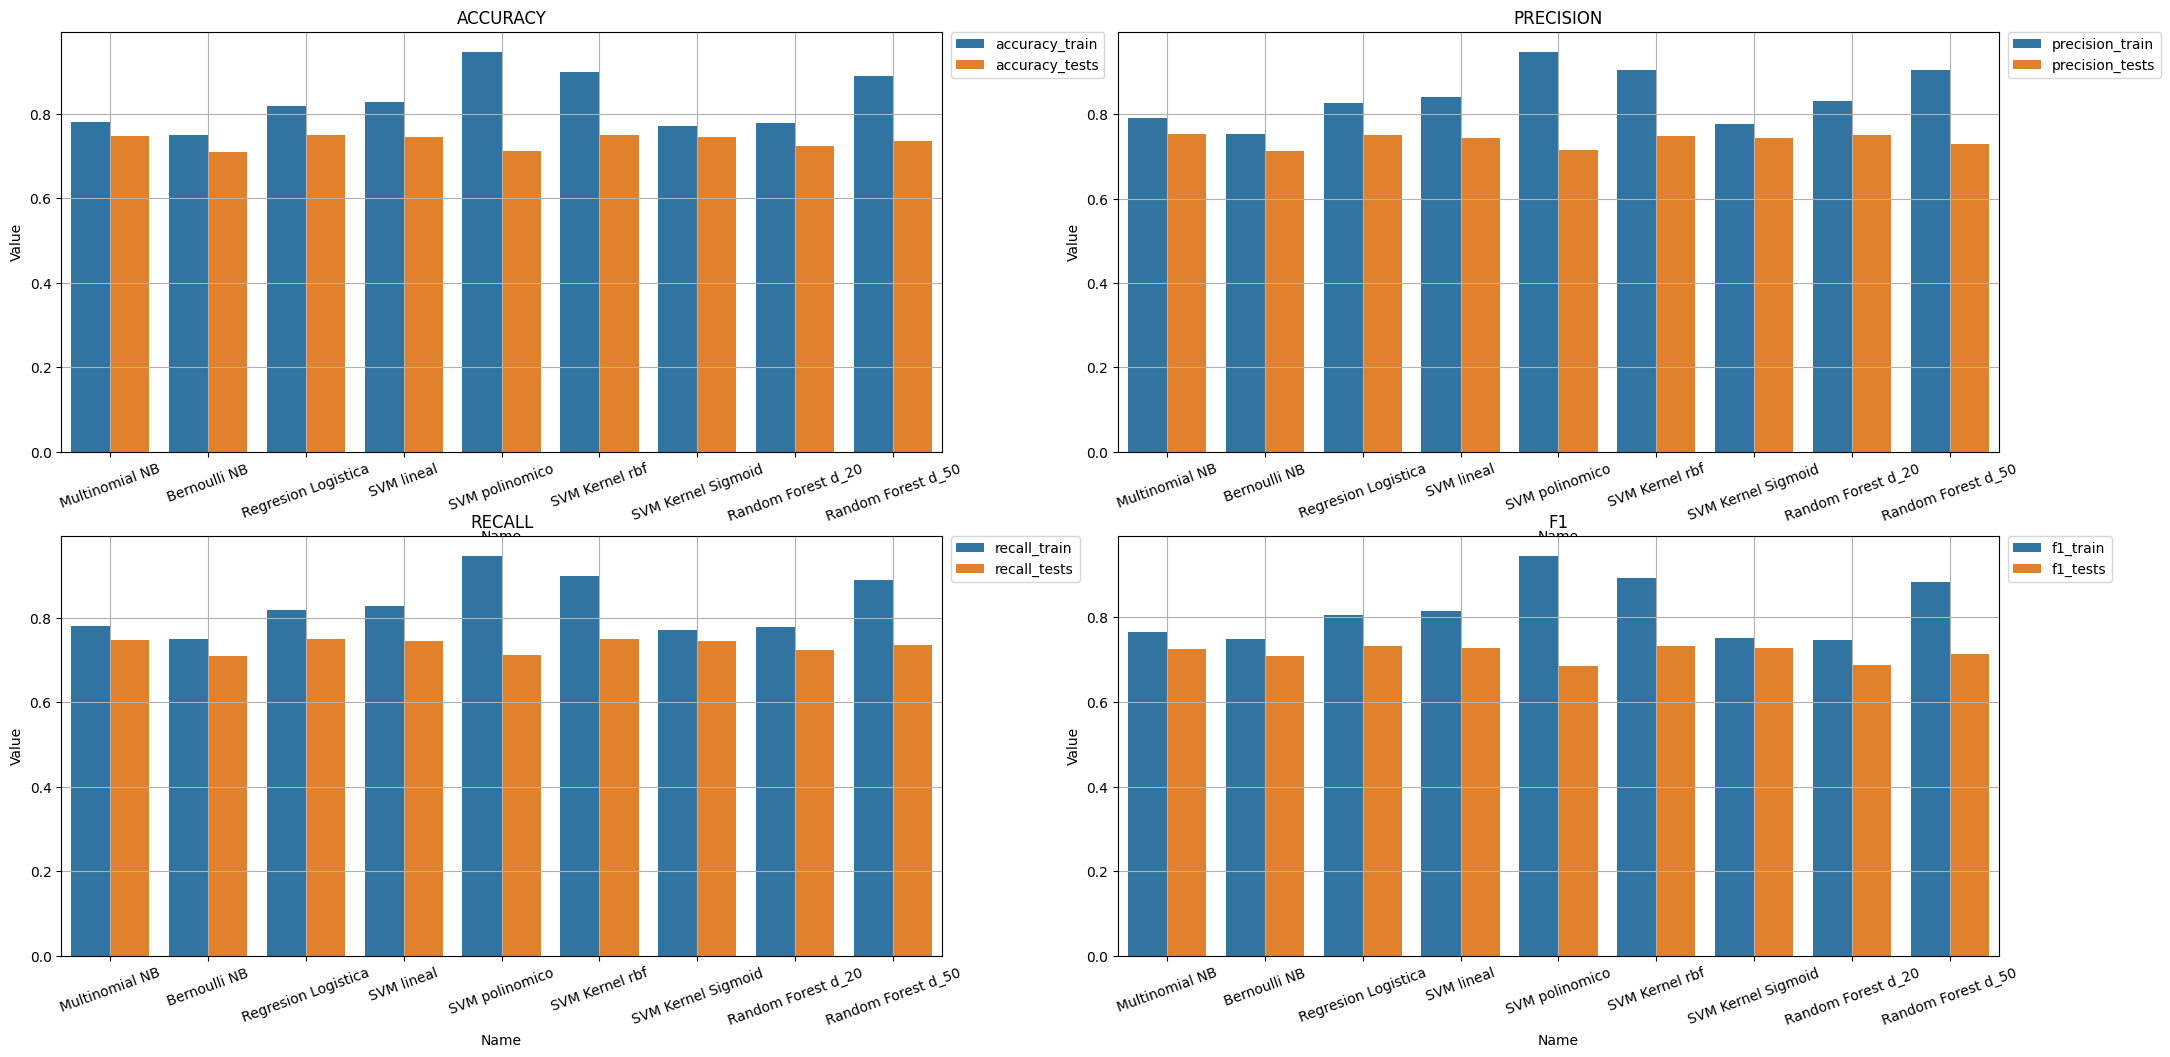

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Métricas a pintar
METRICS = ["accuracy", "precision", "recall", "f1"]

# Transformamos el dataframe para pintar las gráficas con seaborn
df_plot = df.reset_index().melt(id_vars='name').rename(columns=str.title)

plt.figure(figsize=(25, 12))
pos = 1
for metric in METRICS:
    # Filtramos la métrica a pintar
    df_aux = df_plot[df_plot['Variable'].str.contains(metric)]

    # Pintamos la gráfica en su posición 2x2
    plt.subplot(2, 2, pos)
    sns.barplot(x='Name', y='Value', hue='Variable', data=df_aux)
    plt.title(metric.upper())
    plt.grid()
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=20)
    pos += 1
plt.show()